# 26_April(PCA Implementtation)

In [1]:
import pandas as pd

# Load dataset into a Pandas dataframe
df = pd.read_csv('wine.data')
df.shape

(177, 14)

In [2]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X
y


0      1050
1      1185
2      1480
3       735
4      1450
       ... 
172     740
173     750
174     835
175     840
176     560
Name: 1065, Length: 177, dtype: int64

In [3]:
from sklearn.preprocessing import StandardScaler

#scale the features 
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[-1.22246766,  0.2558245 , -0.50162433, ..., -0.29113022,
         0.40709978,  1.13169801],
       [-1.22246766,  0.20622873,  0.01802001, ...,  0.26972932,
         0.3195674 ,  0.80457911],
       [-1.22246766,  1.70650069, -0.34931478, ...,  1.1843618 ,
        -0.4244579 ,  1.20281081],
       ...,
       [ 1.36887097,  0.34261709,  1.73822194, ...,  2.2197948 ,
        -1.60614514, -1.48525319],
       [ 1.36887097,  0.21862767,  0.22408586, ...,  1.83150742,
        -1.56237895, -1.39991783],
       [ 1.36887097,  1.40892609,  1.57695301, ...,  1.78836438,
        -1.51861275, -1.42836295]])

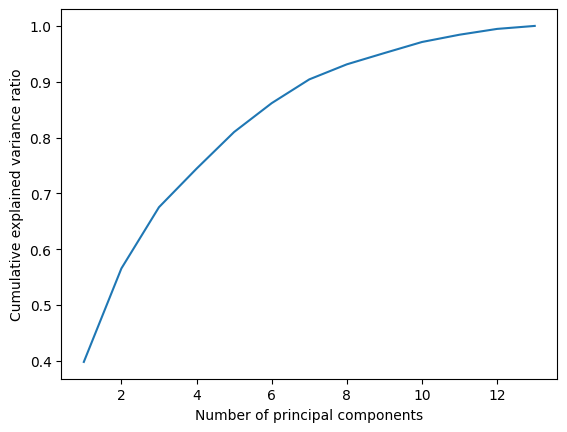

In [4]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
import numpy as np
import matplotlib.pyplot as plt

# Plot the cumulative explained variance ratio
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_var_ratio)+1), cumulative_var_ratio)
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance ratio')
plt.show()

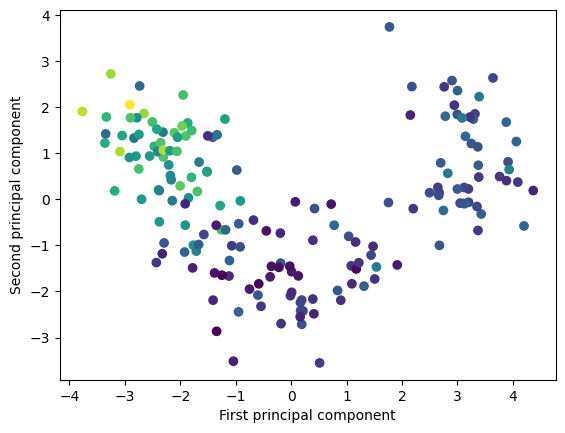

In [5]:
# Create a scatter plot of the first two principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


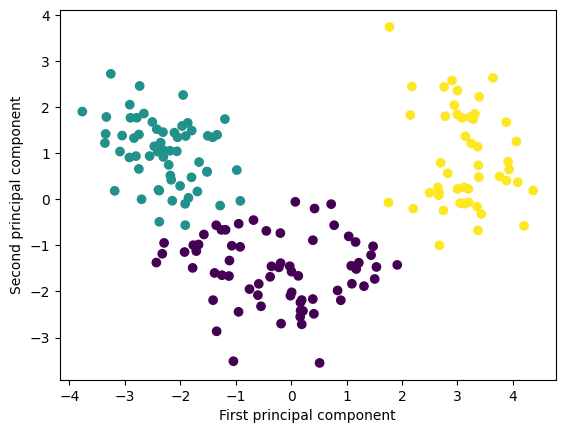

In [6]:
from sklearn.cluster import KMeans

# Perform clustering on the PCA-transformed data
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca)

# Create a scatter plot of the first two principal components, colored by cluster label
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()